In [ ]:
import sys
sys.path.append("..")
from utils.train import train_model
from utils.model import TumorClassifier
from utils.transforms import train_transform, val_transform, test_transform
from utils.metrics import evaluate_and_report
from utils.train2 import train_model2
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import cv2
import torch
from sklearn.preprocessing import LabelEncoder
from torchvision import datasets
from torch.utils.data import random_split, ConcatDataset, DataLoader

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TumorClassifier()
model = model.to(device)

# Load dataset using ImageFolder
train_dataset = datasets.ImageFolder(root="brain_tumor_dataset/Training", transform=train_transform())
test_dataset = datasets.ImageFolder(root="brain_tumor_dataset/Testing", transform=train_transform())
classes = test_dataset.classes
full_dataset = ConcatDataset([train_dataset, test_dataset])

train_dataset, test_dataset = random_split(
    full_dataset,
    [0.7, 0.3],
    generator=torch.Generator().manual_seed(42)
)

In [3]:
train_model(
    model,
    train_dataset,
    batch_size=32,
    epochs=20,
    val_split=0.2,
    lr=0.001,
    save_path="./training_data/effnet_weights_sampler_cosine_best_model.pth",
    use_sampler=True,
    scheduler_type="cosine",
)

Epoch [1/20] - Train Loss: 0.5704, Train Acc: 0.7905 - Val Loss: 0.3941, Val Acc: 0.8731
Epoch [2/20] - Train Loss: 0.3364, Train Acc: 0.8851 - Val Loss: 0.3042, Val Acc: 0.8862
Epoch [3/20] - Train Loss: 0.2555, Train Acc: 0.9185 - Val Loss: 0.2498, Val Acc: 0.9147
Epoch [4/20] - Train Loss: 0.1625, Train Acc: 0.9458 - Val Loss: 0.2534, Val Acc: 0.9125
Epoch [5/20] - Train Loss: 0.2087, Train Acc: 0.9322 - Val Loss: 0.1820, Val Acc: 0.9387
Epoch [6/20] - Train Loss: 0.1502, Train Acc: 0.9513 - Val Loss: 0.1587, Val Acc: 0.9540
Epoch [7/20] - Train Loss: 0.1706, Train Acc: 0.9458 - Val Loss: 0.1680, Val Acc: 0.9387
Epoch [8/20] - Train Loss: 0.1158, Train Acc: 0.9617 - Val Loss: 0.1710, Val Acc: 0.9562
Epoch [9/20] - Train Loss: 0.1415, Train Acc: 0.9519 - Val Loss: 0.2310, Val Acc: 0.9234
Epoch [10/20] - Train Loss: 0.1623, Train Acc: 0.9469 - Val Loss: 0.1889, Val Acc: 0.9540
Epoch [11/20] - Train Loss: 0.1048, Train Acc: 0.9644 - Val Loss: 0.1638, Val Acc: 0.9475
Early stopping trig

([0.5704145574987065,
  0.33635861268450445,
  0.25550996031229034,
  0.16251788364980102,
  0.20874861280558146,
  0.1502165190174491,
  0.1706489675741488,
  0.11580360977537522,
  0.14148157910001616,
  0.16229114583662876,
  0.10478697974780977],
 [0.39411593063915845,
  0.30415456420874437,
  0.2497933746786295,
  0.25338103444492793,
  0.1819592229329066,
  0.15867362759652787,
  0.16804038311397612,
  0.17096860143529247,
  0.2310425585168424,
  0.1889488681502787,
  0.16379894889204374],
 [0.7904814004376368,
  0.8851203501094091,
  0.9184901531728665,
  0.9458424507658644,
  0.9321663019693655,
  0.9513129102844639,
  0.9458424507658644,
  0.9617067833698031,
  0.9518599562363238,
  0.9469365426695843,
  0.9644420131291028],
 [0.8730853391684902,
  0.8862144420131292,
  0.9146608315098468,
  0.912472647702407,
  0.9387308533916849,
  0.9540481400437637,
  0.9387308533916849,
  0.9562363238512035,
  0.9234135667396062,
  0.9540481400437637,
  0.9474835886214442])

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TumorClassifier()
model = model.to(device)
model.load_state_dict(torch.load("./training_data/effnet_weights_sampler_cosine2.pth"))
model.eval()  # Set the model to evaluation mode

/tmp/ipykernel_1244632/2746884927.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("./training_data/effnet_weights_sampler_cosine2.pth"))

TumorClassifier(
  (base_model): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_act

In [6]:
test_dataset.dataset.transform = val_transform()
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


=== Classification Report ===
                  precision    recall  f1-score   support

    glioma_tumor       0.96      0.97      0.96       284
meningioma_tumor       0.96      0.94      0.95       260
        no_tumor       0.97      0.99      0.98       156
 pituitary_tumor       0.99      0.98      0.98       279

        accuracy                           0.97       979
       macro avg       0.97      0.97      0.97       979
    weighted avg       0.97      0.97      0.97       979


=== Test Accuracy: 96.94% ===


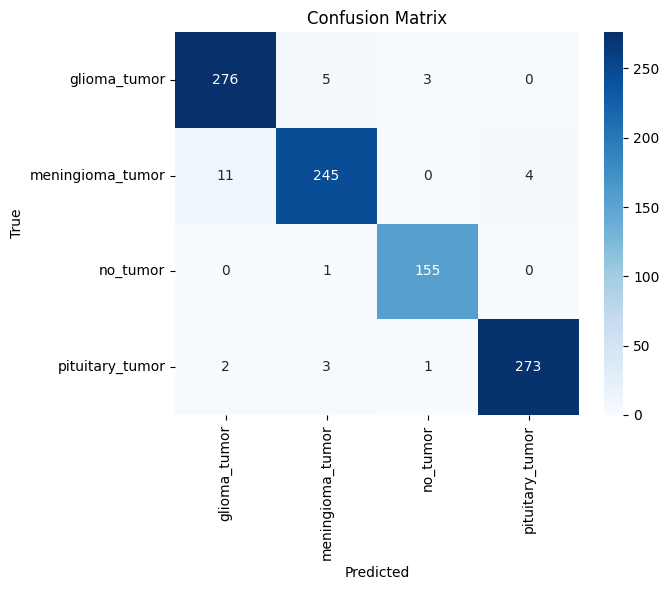

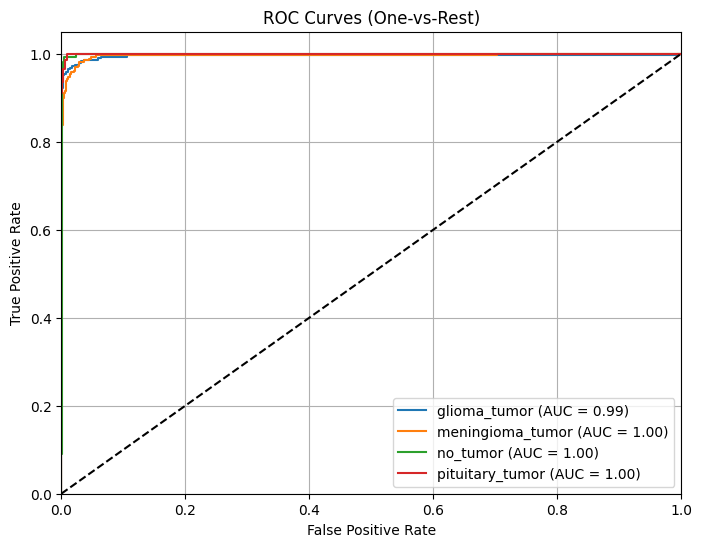

(array([2, 0, 1, 3, 1, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 1, 3, 1, 2, 1, 0, 3,
        0, 3, 3, 3, 0, 1, 1, 0, 1, 2, 0, 1, 3, 0, 3, 3, 1, 3, 3, 0, 0, 1,
        1, 3, 0, 0, 0, 2, 3, 0, 3, 3, 1, 3, 3, 0, 3, 3, 2, 3, 0, 0, 2, 2,
        1, 3, 0, 0, 2, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 2, 1, 0, 3, 1, 1,
        3, 0, 3, 0, 0, 3, 3, 2, 3, 3, 0, 0, 1, 0, 1, 3, 0, 0, 0, 1, 0, 1,
        3, 1, 1, 0, 2, 2, 0, 0, 2, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 1, 3, 0,
        0, 3, 3, 0, 3, 3, 3, 2, 1, 0, 1, 3, 2, 1, 3, 0, 2, 3, 3, 0, 3, 3,
        3, 1, 3, 1, 2, 0, 3, 2, 1, 1, 0, 1, 1, 3, 0, 0, 3, 1, 2, 1, 1, 2,
        1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 3, 1, 1, 0, 1, 0, 2, 1, 1, 1,
        0, 1, 3, 1, 0, 2, 2, 3, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 3, 3, 2, 2,
        0, 3, 1, 3, 3, 2, 1, 0, 0, 1, 2, 0, 3, 3, 3, 0, 3, 0, 3, 1, 3, 1,
        1, 3, 0, 0, 0, 3, 0, 3, 3, 3, 1, 3, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0,
        0, 2, 3, 0, 3, 0, 2, 2, 3, 1, 3, 0, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0,
        2, 2, 1, 0, 2, 0, 3, 3, 1, 0, 

In [7]:
evaluate_and_report(
    model,
    test_loader,
    device,
    classes,
)